# Kütüphaneleri ve Veri Setini Yükleme

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
ad = pd.read_csv("advertising.csv")
df = ad.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Tanımsal İstatistikler

In [24]:
df.shape

(200, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [6]:
#Bağımlı değişkenin normal dağılım testi
from scipy.stats import shapiro
stat, p = shapiro(df['Sales'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Bağımlı değişken normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Bağımlı değişken normal dağılıma uygun değil (H0 RED)')

Statistics=0.988, p=0.076
Bağımlı değişken normal dağılıma uygun (H0 REDDEDİLEMEZ)


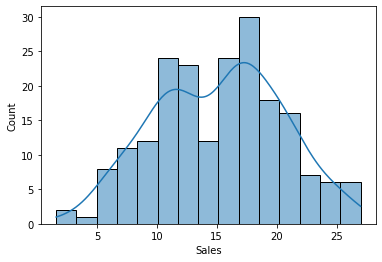

In [28]:
# bağımlı değ dağılımı
sns.histplot(data=df, x='Sales', bins=15, kde=True)
plt.show()

## Korelasyon

In [29]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


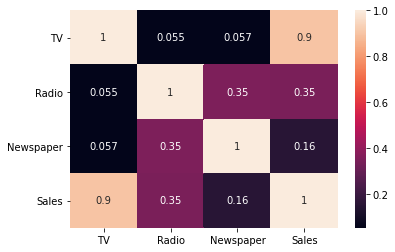

In [30]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Regresyon Modeli

In [31]:
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

In [32]:
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()

In [33]:
model.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           8.13e-99
Time:                        12:36:09   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## Artık Hesaplama

In [35]:
#model.resid şeklinde de elde edilebilir

In [36]:
tahmin_tablosu = pd.DataFrame({"gercek_y": y,
                   "tahmin_y": round(model.fittedvalues)})
tahmin_tablosu["hata"] = tahmin_tablosu["gercek_y"] - tahmin_tablosu["tahmin_y"]

In [37]:
tahmin_tablosu

,gercek_y,tahmin_y,hata
0,22.1,21.0,1.1
1,10.4,11.0,-0.6
2,12.0,10.0,2.0
3,16.5,17.0,-0.5
4,17.9,16.0,1.9
...,...,...,...
195,7.6,7.0,0.6
196,14.0,10.0,4.0
197,14.8,15.0,-0.2
198,25.5,25.0,0.5


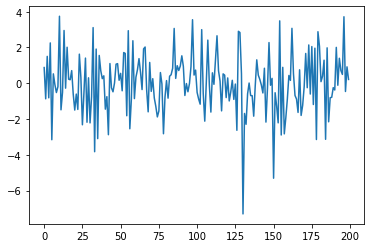

In [38]:
plt.plot(model.resid)

In [39]:
#Modelin MSE'si
print("Model Hatası:", round(np.sqrt(np.mean(tahmin_tablosu["hata"]*tahmin_tablosu["hata"]))))

Model Hatası: 2


In [40]:
X=X.drop("const", axis=1)

## Çoklu Doğrusallık Varsayımı

In [41]:
#vif
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


Vif değerlerine baktığımızda 5'ten büyük bir değer olmadığı için çoklu doğrusallık probleminin olmadığını söyleyebiliriz. Bu da değişkenler birbirleri arasında ilişki içinde değildir şeklinde yorumlanabilir.

## Hataların normal dağılımı

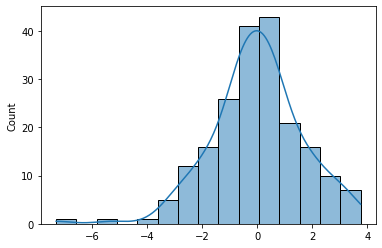

In [42]:
sns.histplot(x=model.resid, bins=15, kde=True)
plt.show()

In [43]:
# normal dağılım testi
from scipy.stats import shapiro
stat, p = shapiro(tahmin_tablosu["hata"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.980, p=0.005
Hatalar normal dağılıma uygun değil (H0 RED)


In [44]:
np.mean(model.resid)

-4.3520742565306136e-16

## Değişen Varyans Sorunu (Heteroscedasticity Test)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  3.978527
p-value                        0.263792
f-value                        1.326030
f p-value                      0.267105

 Goldfeld-Quandt test ----
                value
F statistic  1.381930
p-value      0.057376

 Residuals plots ----


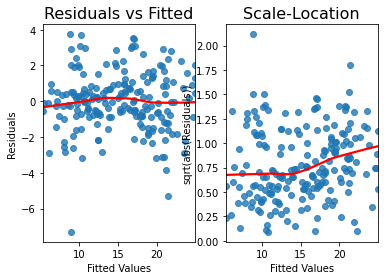

In [45]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)

Yapılan testlere göre H0 reddedilemeyeceğinden değişen varyans sorunumuz yoktur.